Latin Hypercube Implementation


In [208]:
! pip install -r requirements.txt

In [209]:
import math
import torch
from matplotlib import pyplot as plt
import time

from data import Dataprep, load_data
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd

In [210]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import qmc
from os import path

In [211]:
dataset_type='Caselist'
sensor='foundation_origin xy FloaterOffset [m]'
samples_per_step=0
validation_size=0.1
initial_sample_size=33

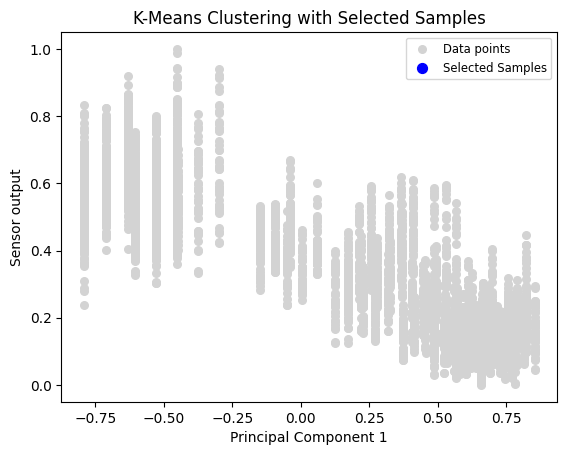

In [212]:
data = Dataprep(dataset_type, sensor, initial_samplesize=samples_per_step, scaling='Minmax')
known_data, pool_data = data.known_data, data.pool_data

In [213]:
# HYPERPARAMETERS STRENGTH OR OPTIMIZATION

#sampler = qmc.LatinHypercube(d=2, strength=2)
#sample = sampler.random(n=9)
#qmc.discrepancy(sample)

#sampler = qmc.LatinHypercube(d=2, optimization="random-cd")
#sample = sampler.random(n=5)
#qmc.discrepancy(sample)

In [214]:
pool_data.shape

(5668, 4)

In [215]:
# get the unique values for each column
unique_values = [np.unique(pool_data[:, i]) for i in range(pool_data.shape[1] - 1)]

# get the shape of the unique values
unique_shapes = [unique_values[i].shape[0] for i in range(len(unique_values))]
unique_shapes




[8, 8, 29]

In [216]:
# get the first and last indice of the unique value lists
first_indices = [0]*len(unique_shapes)
last_indices = [unique_shapes[i] for i in range(len(unique_shapes))]
first_indices, last_indices

([0, 0, 0], [8, 8, 29])

In [217]:
# define the last indices as lower and upper bounds
lower_bounds = first_indices
upper_bounds = last_indices
lower_bounds, upper_bounds


([0, 0, 0], [8, 8, 29])

In [235]:
from scipy.stats import qmc

# Create an integer Latin hypercube sampler
sampler = qmc.LatinHypercube(d=len(unique_shapes), optimization="random-cd")

# Generate the samples within the specified bounds
samples = sampler.integers(l_bounds=lower_bounds, u_bounds=upper_bounds, n=100)

In [236]:
samples

array([[ 0,  7,  1],
       [ 6,  4, 16],
       [ 3,  6,  5],
       [ 1,  2, 26],
       [ 5,  6, 28],
       [ 3,  4, 25],
       [ 2,  3, 17],
       [ 5,  4,  6],
       [ 1,  5,  7],
       [ 1,  3, 16],
       [ 5,  5, 21],
       [ 1,  5, 13],
       [ 6,  6, 13],
       [ 0,  0, 17],
       [ 7,  1,  7],
       [ 7,  6, 25],
       [ 3,  2,  6],
       [ 0,  4,  3],
       [ 7,  4, 19],
       [ 3,  0, 18],
       [ 4,  5,  8],
       [ 3,  7,  1],
       [ 6,  5,  2],
       [ 3,  1, 28],
       [ 4,  1, 15],
       [ 6,  3,  8],
       [ 3,  2, 22],
       [ 4,  0, 26],
       [ 2,  4,  6],
       [ 1,  7, 27],
       [ 6,  3, 12],
       [ 7,  5,  0],
       [ 7,  2, 21],
       [ 2,  7, 22],
       [ 6,  7, 18],
       [ 2,  6,  3],
       [ 3,  0,  1],
       [ 3,  4, 13],
       [ 1,  2,  0],
       [ 2,  1, 23],
       [ 0,  3,  9],
       [ 1,  3, 13],
       [ 4,  2,  2],
       [ 4,  6, 18],
       [ 0,  7, 14],
       [ 5,  1, 21],
       [ 7,  0, 14],
       [ 1,  

In [237]:
unique_values

[array([0.        , 0.14049578, 0.40495872, 0.5950413 , 0.66942143,
        0.76859474, 0.7851236 , 1.        ], dtype=float32),
 array([0.        , 0.03191492, 0.06382984, 0.07446814, 0.2021277 ,
        0.4787234 , 0.80851066, 1.        ], dtype=float32),
 array([0.        , 0.0167442 , 0.04186046, 0.06511629, 0.07534885,
        0.08372092, 0.09209299, 0.10046512, 0.11162788, 0.13023251,
        0.14883721, 0.15069765, 0.1674419 , 0.17674416, 0.18139535,
        0.22232556, 0.2427907 , 0.25116277, 0.25302333, 0.29302323,
        0.3348837 , 0.39069766, 0.4883721 , 0.62790704, 0.71162796,
        0.7627907 , 0.855814  , 0.89767444, 1.        ], dtype=float32)]

In [238]:
len(samples)

100

In [239]:
samples.shape

(100, 3)

In [240]:
selected_values = []
for sample in samples:
    help_list = []
    for j in range(len(sample)):
        help_list.append(unique_values[j][sample[j]])
    selected_values.append(help_list)

In [241]:
selected_values

[[0.0, 1.0, 0.016744196],
 [0.7851236, 0.2021277, 0.2427907],
 [0.5950413, 0.80851066, 0.08372092],
 [0.14049578, 0.06382984, 0.855814],
 [0.76859474, 0.80851066, 1.0],
 [0.5950413, 0.2021277, 0.7627907],
 [0.40495872, 0.074468136, 0.25116277],
 [0.76859474, 0.2021277, 0.09209299],
 [0.14049578, 0.4787234, 0.10046512],
 [0.14049578, 0.074468136, 0.2427907],
 [0.76859474, 0.4787234, 0.39069766],
 [0.14049578, 0.4787234, 0.17674416],
 [0.7851236, 0.80851066, 0.17674416],
 [0.0, 0.0, 0.25116277],
 [1.0, 0.03191492, 0.10046512],
 [1.0, 0.80851066, 0.7627907],
 [0.5950413, 0.06382984, 0.09209299],
 [0.0, 0.2021277, 0.06511629],
 [1.0, 0.2021277, 0.29302323],
 [0.5950413, 0.0, 0.25302333],
 [0.66942143, 0.4787234, 0.11162788],
 [0.5950413, 1.0, 0.016744196],
 [0.7851236, 0.4787234, 0.04186046],
 [0.5950413, 0.03191492, 1.0],
 [0.66942143, 0.03191492, 0.22232556],
 [0.7851236, 0.074468136, 0.11162788],
 [0.5950413, 0.06382984, 0.4883721],
 [0.66942143, 0.0, 0.855814],
 [0.40495872, 0.2021277,

In [242]:
len(selected_values)

100

In [255]:
import numpy as np

matching_indices = []
for selected_value in selected_values:
    # Calculate the Euclidean distance between the selected value and each row in pool_data
    distances = np.linalg.norm(pool_data[:, :3] - selected_value[:3], axis=1)
    
    # Check if there is a direct match
    direct_match_indices = np.where(distances == 0)[0]
    if len(direct_match_indices) > 0:
        print('Direct match found')
        matching_indices.append(direct_match_indices[0])
    else:
        # Find the index of the row with the highest similarity
        max_similarity_index = np.argmax(distances)
        matching_indices.append(max_similarity_index)
        
        # Check if the point is already in the matching_indices array
        if max_similarity_index in matching_indices:
            # Find the index of the second nearest point
            second_nearest_index = np.argsort(distances)[1]
            matching_indices[-1] = second_nearest_index

matching_indices = np.array(matching_indices)


Direct match found
Direct match found
Direct match found


In [259]:
len(np.unique(matching_indices)    )

98

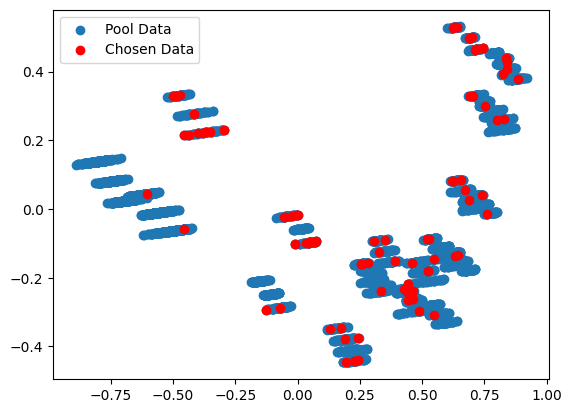

In [257]:
# Generate PCA
pca = PCA(n_components=2)
pool_data_pca = pca.fit_transform(pool_data)

# Plot pool data with two PC
plt.scatter(pool_data_pca[:, 0], pool_data_pca[:, 1], label='Pool Data')

# Plot data with corresponding indices
plt.scatter(pool_data_pca[matching_indices, 0], pool_data_pca[matching_indices, 1], label='Chosen Data', c='red')

# Add legend
plt.legend()

# Show the plot
plt.show()





In [243]:
# transform the selected values to a numpy array
selected_values = np.array(selected_values)

selected_values.shape


(100, 3)

In [244]:
pool_data[:,:-1].shape

(5668, 3)

In [245]:
# check if the arrays from selected values are in the pool data
indices = []
for i in range(len(selected_values)):
    for j in range(len(pool_data)):
        if np.array_equal(selected_values[i], pool_data[j][:-1]):
            indices.append(j)
            break

In [246]:
indices

[253, 2830, 580, 720]

In [248]:
sample_size = 30

while len(indices) < sample_size:
    # Generate the samples within the specified bounds
    samples = sampler.integers(l_bounds=lower_bounds, u_bounds=upper_bounds, n=100)
    selected_values = []
    for sample in samples:
        help_list = []
        for j in range(len(sample)):
            help_list.append(unique_values[j][sample[j]])
        selected_values.append(help_list)
    selected_values = np.array(selected_values)
    for i in range(len(selected_values)):
        for j in range(len(pool_data)):
            if np.array_equal(selected_values[i], pool_data[j][:-1]):
                indices.append(j)
                break

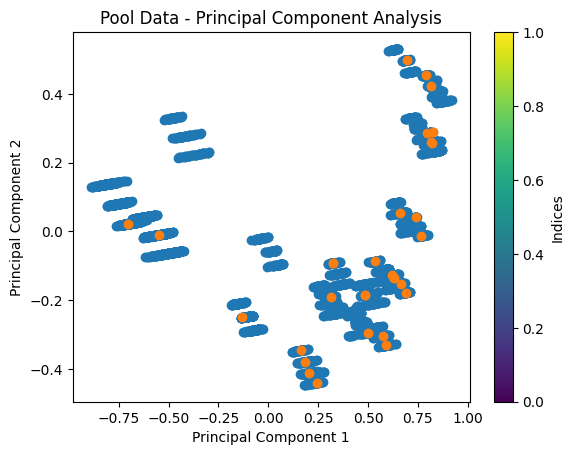

In [249]:
from sklearn.decomposition import PCA

# Perform PCA on the pool data
pca = PCA(n_components=2)
pool_data_pca = pca.fit_transform(pool_data)

# Plot the data points on the first two components
plt.scatter(pool_data_pca[:, 0], pool_data_pca[:, 1])
plt.scatter(pool_data_pca[indices, 0], pool_data_pca[indices, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Pool Data - Principal Component Analysis')
plt.colorbar(label='Indices')
plt.show()


Load Data and Normalize

In [ ]:
# We will use the simplest form of GP model, exact inference
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        # kernel can be changed or combined !
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# initialize likelihood and model
#likelihood = gpytorch.likelihoods.GaussianLikelihood()
#model = ExactGPModel(train_x, train_y, likelihood)

In [ ]:
from torch.optim import Adam

In [ ]:
def init_optimizer(learning_rate):
    optimizer = Adam(model.parameters(), lr=learning_rate)
    return optimizer
    
def train_model(step):
    print('K_D, P_D', known_data.shape, pool_data.shape)

    # Split the pool data into train and validation sets
    train, val = train_test_split(known_data, test_size=validation_size)

    X_train = torch.tensor(scaler.fit_transform(train[:, 0].reshape(-1, 1))).to(device)  # Adds an extra dimension to make X_train a 2D tensor
    y_train = torch.tensor(train[:, 1]).to(device)
    
    # Initialize likelihood and model with training data
    likelihood = gpytorch.likelihoods.GaussianLikelihood().to(device)
    model = ExactGPModel(X_train, y_train, likelihood).to(device)
    
    model.train()
    likelihood.train()

    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
    total_train_loss = 0

    x, y = X_train, y_train

    # Find optimal model hyperparameters
    model.train()
    likelihood.train()

    # Use the adam optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    for epoch in range(epochs):
        # Zero gradients from previous iteration
        optimizer.zero_grad()
        # Output from model
        output = model(X_train)
        # Calc loss and backprop gradients
        loss = -mll(output, y_train)
        loss.backward()
        print('Epoch %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
            epoch +1, epochs, loss.item(),
            model.covar_module.base_kernel.lengthscale.item(),
            model.likelihood.noise.item()
        ))
        optimizer.step()

    preds = evaluate_model(likelihood, model,val, step) # Evaluate the model on the validation set

    return preds


In [ ]:
def evaluate_model(likelihood, model,val_loader, step): # 1: EVALUATE THE MODEL ON THE VALIDATION SET

    X_val = torch.tensor(scaler.fit_transform(val[:, 0].reshape(-1, 1))).to(device)  # Adds an extra dimension to make X_train a 2D tensor
    y_val = torch.tensor(val[:, 1]).to(device)
    x, y = X_val, y_val
    # Get into evaluation (predictive posterior) mode
    model.eval()
    likelihood.eval()

    total_val_loss = 0
    # Make predictions by feeding model through likelihood
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        test_x = torch.linspace(0, 1, 51)
        observed_pred = likelihood(model(X_val))
        output = model(X_val)
        loss = -mll(output, y_val)
        total_val_loss += loss.item()

    step_val_loss = total_val_loss  # Average loss over batches
    writer.add_scalar('loss/val', step_val_loss, step+1)
    if verbose:
        print('Step: {}, Val-Loss: {:.4f}'.format(step+1, step_val_loss))

    if known_data.shape[1] == 2:
        preds = plot(likelihood, model, step)
    return preds

In [ ]:
def plot(likelihood, model, step, samples=500):
    x_pool = pool_data[:, :-1]
    y_pool = pool_data[:, -1]

    x_selected = known_data[:, :-1]
    y_selected = known_data[:, -1]

    scaler = MinMaxScaler()
    x_pool_scaled = scaler.fit_transform(x_pool)
    x_selected_scaled = scaler.transform(x_selected)
    
    x_pool_torch = torch.tensor(x_pool_scaled) 

    model.eval()
    likelihood.eval()

    # Make predictions by feeding model through likelihood
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        preds = likelihood(model(x_pool_torch))

    means = preds.mean.numpy()  # calculate the mean of the predictions
    lower, upper = preds.confidence_region()
    stds = preds.stddev.numpy()
    
    # Prepare data for plotting
    #df = pd.DataFrame({'x': x_pool_torch.squeeze(), 'mean': means.squeeze(), 'lower': lower, 'upper': upper})

    dfs = []
    y_vals = [means, means + 1 * stds, means - 1 * stds]

    for i in range(3): #len(y_vals)
        dfs.append(pd.DataFrame({'x': x_pool_torch.squeeze(), 'y': y_vals[i].squeeze()}))
    df = pd.concat(dfs)

    print(means.squeeze())
    
    # Plotting
    fig = plt.figure()
    sns.lineplot(data=df, x="x", y="y")
    plt.scatter(x_pool_scaled, y_pool, c="green", marker="*", alpha=0.1)  # Plot actual y values
    plt.scatter(x_selected_scaled, y_selected, c="red", marker="*", alpha=0.2) # plot train data on top
    plt.title(f'Predictions vs Actual Step {step+1}')
    plt.legend(['Mean prediction', 'Pool data (unseen)', 'Seen data'], fontsize='small')
    plt.close(fig)

    # Log the table figure
    writer.add_figure(f'Prediction vs Actual Table Epoch {step+1}', fig, step+1)

    # Log the table figure
    writer.add_figure(f'Prediction vs Actual Table Epoch {step+1}', fig, step+1)

    return preds

In [ ]:
import random

In [ ]:
def predict(self, x): # 2: PREDICT THE UNCERTAINTY ON THE POOL DATA
        pass

def acquisition_function(n, pool_data=pool_data, known_data=known_data): # 3: DECIDE WHICH SAMPLES TO SELECT FROM THE POOL DATA (USING ACQUISITION FUNCTION)
    selected_indices = random.sample(range(len(pool_data)), n)
    known_data, pool_data = update_data(known_data, pool_data, selected_indices)

    return known_data, pool_data

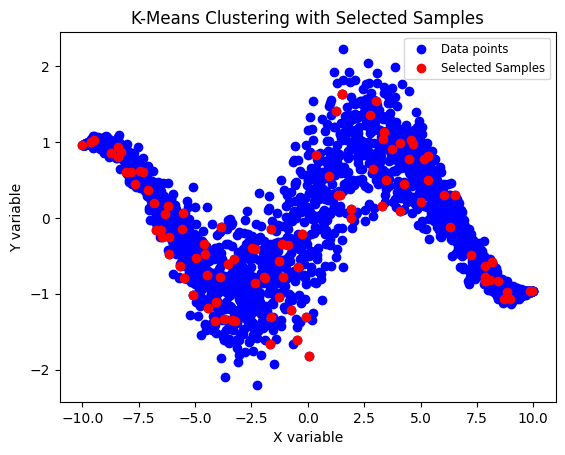

In [ ]:
data = Dataprep(dataset_type, sensor, initial_samplesize=samples_per_step)
known_data, pool_data = data.known_data, data.pool_data

In [ ]:
from torch.utils.tensorboard import SummaryWriter
import datetime

In [ ]:
steps = 10
learning_rate = 0.1
epochs = 10
verbose=True
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # Unique directory based on datetime for each run
log_dir = os.path.join('Models/runs', 'BNN_' + dataset_type  + '_' + current_time)
writer = SummaryWriter(log_dir) 

optimizer = init_optimizer(learning_rate) # Initialize the optimizer
device = torch.device("cpu" if torch.backends.mps.is_available() else "cpu")

In [ ]:
known_data, pool_data = data.known_data, data.pool_data

K_D, P_D (100, 2) (1900, 2)
Epoch 1/10 - Loss: 1.256   lengthscale: 0.693   noise: 0.693
Epoch 2/10 - Loss: 1.252   lengthscale: 0.644   noise: 0.644
Epoch 3/10 - Loss: 1.248   lengthscale: 0.600   noise: 0.626
Epoch 4/10 - Loss: 1.240   lengthscale: 0.558   noise: 0.624
Epoch 5/10 - Loss: 1.226   lengthscale: 0.520   noise: 0.613
Epoch 6/10 - Loss: 1.205   lengthscale: 0.484   noise: 0.588
Epoch 7/10 - Loss: 1.173   lengthscale: 0.450   noise: 0.558
Epoch 8/10 - Loss: 1.129   lengthscale: 0.418   noise: 0.525
Epoch 9/10 - Loss: 1.074   lengthscale: 0.387   noise: 0.493
Epoch 10/10 - Loss: 1.011   lengthscale: 0.357   noise: 0.460
Step: 1, Val-Loss: 0.1980


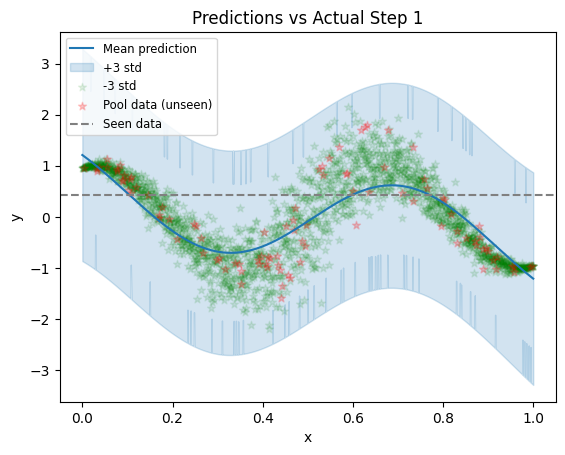

Step: 1 of 10, time-taken: 12.41 seconds
K_D, P_D (200, 2) (1800, 2)
Epoch 1/10 - Loss: 1.180   lengthscale: 0.693   noise: 0.693
Epoch 2/10 - Loss: 1.165   lengthscale: 0.644   noise: 0.644
Epoch 3/10 - Loss: 1.144   lengthscale: 0.599   noise: 0.598
Epoch 4/10 - Loss: 1.114   lengthscale: 0.557   noise: 0.555
Epoch 5/10 - Loss: 1.072   lengthscale: 0.518   noise: 0.513
Epoch 6/10 - Loss: 1.017   lengthscale: 0.481   noise: 0.474
Epoch 7/10 - Loss: 0.952   lengthscale: 0.446   noise: 0.437
Epoch 8/10 - Loss: 0.882   lengthscale: 0.412   noise: 0.403
Epoch 9/10 - Loss: 0.813   lengthscale: 0.380   noise: 0.370
Epoch 10/10 - Loss: 0.749   lengthscale: 0.350   noise: 0.340
Step: 2, Val-Loss: 0.1831


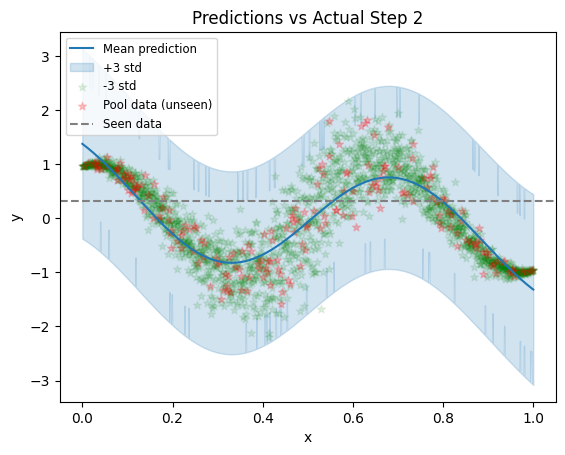

Step: 2 of 10, time-taken: 11.49 seconds
K_D, P_D (300, 2) (1700, 2)
Epoch 1/10 - Loss: 1.144   lengthscale: 0.693   noise: 0.693
Epoch 2/10 - Loss: 1.122   lengthscale: 0.644   noise: 0.644
Epoch 3/10 - Loss: 1.093   lengthscale: 0.599   noise: 0.598
Epoch 4/10 - Loss: 1.053   lengthscale: 0.557   noise: 0.554
Epoch 5/10 - Loss: 1.001   lengthscale: 0.517   noise: 0.513
Epoch 6/10 - Loss: 0.938   lengthscale: 0.480   noise: 0.474
Epoch 7/10 - Loss: 0.870   lengthscale: 0.444   noise: 0.437
Epoch 8/10 - Loss: 0.802   lengthscale: 0.409   noise: 0.402
Epoch 9/10 - Loss: 0.737   lengthscale: 0.377   noise: 0.369
Epoch 10/10 - Loss: 0.677   lengthscale: 0.346   noise: 0.338
Step: 3, Val-Loss: 0.1724


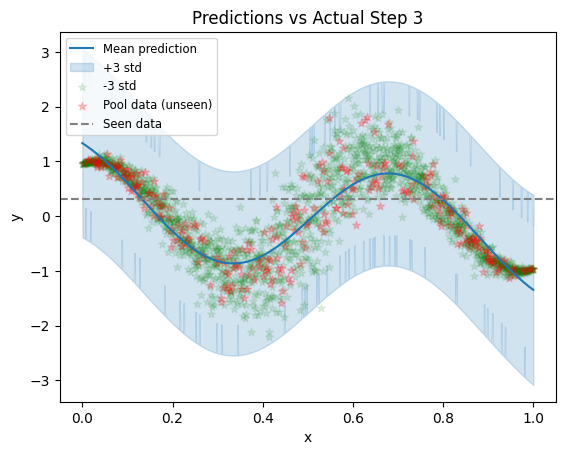

Step: 3 of 10, time-taken: 11.40 seconds
K_D, P_D (400, 2) (1600, 2)
Epoch 1/10 - Loss: 1.168   lengthscale: 0.693   noise: 0.693
Epoch 2/10 - Loss: 1.143   lengthscale: 0.644   noise: 0.644
Epoch 3/10 - Loss: 1.107   lengthscale: 0.599   noise: 0.598
Epoch 4/10 - Loss: 1.059   lengthscale: 0.556   noise: 0.554
Epoch 5/10 - Loss: 1.000   lengthscale: 0.516   noise: 0.513
Epoch 6/10 - Loss: 0.933   lengthscale: 0.478   noise: 0.474
Epoch 7/10 - Loss: 0.865   lengthscale: 0.441   noise: 0.437
Epoch 8/10 - Loss: 0.800   lengthscale: 0.407   noise: 0.402
Epoch 9/10 - Loss: 0.740   lengthscale: 0.374   noise: 0.370
Epoch 10/10 - Loss: 0.685   lengthscale: 0.344   noise: 0.339
Step: 4, Val-Loss: 0.1796


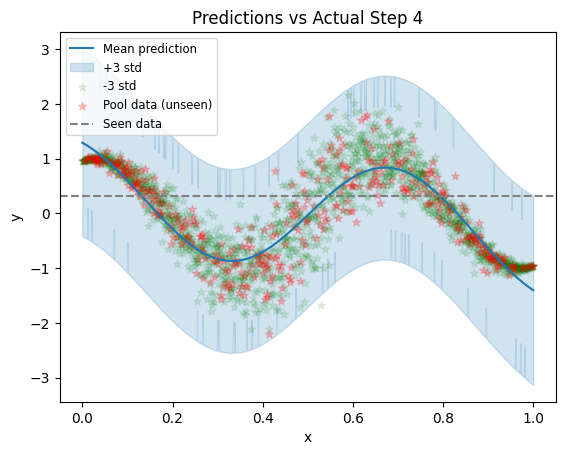

Step: 4 of 10, time-taken: 10.43 seconds
K_D, P_D (500, 2) (1500, 2)
Epoch 1/10 - Loss: 1.154   lengthscale: 0.693   noise: 0.693
Epoch 2/10 - Loss: 1.124   lengthscale: 0.644   noise: 0.644
Epoch 3/10 - Loss: 1.083   lengthscale: 0.599   noise: 0.598
Epoch 4/10 - Loss: 1.030   lengthscale: 0.556   noise: 0.554
Epoch 5/10 - Loss: 0.967   lengthscale: 0.515   noise: 0.513
Epoch 6/10 - Loss: 0.901   lengthscale: 0.476   noise: 0.474
Epoch 7/10 - Loss: 0.836   lengthscale: 0.440   noise: 0.437
Epoch 8/10 - Loss: 0.776   lengthscale: 0.405   noise: 0.402
Epoch 9/10 - Loss: 0.720   lengthscale: 0.373   noise: 0.369
Epoch 10/10 - Loss: 0.666   lengthscale: 0.343   noise: 0.338
Step: 5, Val-Loss: 0.1538


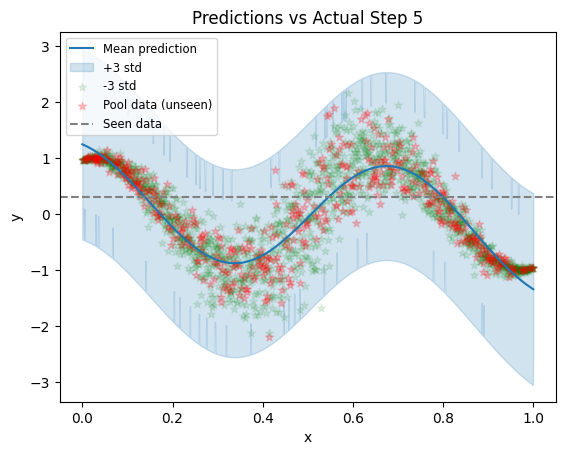

Step: 5 of 10, time-taken: 10.02 seconds
K_D, P_D (600, 2) (1400, 2)
Epoch 1/10 - Loss: 1.145   lengthscale: 0.693   noise: 0.693
Epoch 2/10 - Loss: 1.111   lengthscale: 0.644   noise: 0.644
Epoch 3/10 - Loss: 1.065   lengthscale: 0.599   noise: 0.598
Epoch 4/10 - Loss: 1.008   lengthscale: 0.555   noise: 0.554
Epoch 5/10 - Loss: 0.944   lengthscale: 0.515   noise: 0.513
Epoch 6/10 - Loss: 0.879   lengthscale: 0.476   noise: 0.474
Epoch 7/10 - Loss: 0.816   lengthscale: 0.439   noise: 0.437
Epoch 8/10 - Loss: 0.759   lengthscale: 0.404   noise: 0.402
Epoch 9/10 - Loss: 0.705   lengthscale: 0.372   noise: 0.369
Epoch 10/10 - Loss: 0.653   lengthscale: 0.343   noise: 0.338
Step: 6, Val-Loss: 0.1523


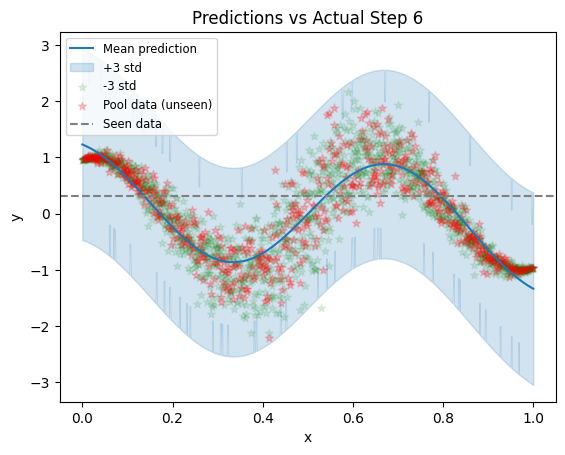

Step: 6 of 10, time-taken: 9.41 seconds
K_D, P_D (700, 2) (1300, 2)
Epoch 1/10 - Loss: 1.149   lengthscale: 0.693   noise: 0.693
Epoch 2/10 - Loss: 1.112   lengthscale: 0.644   noise: 0.644
Epoch 3/10 - Loss: 1.063   lengthscale: 0.599   noise: 0.598
Epoch 4/10 - Loss: 1.003   lengthscale: 0.555   noise: 0.554
Epoch 5/10 - Loss: 0.938   lengthscale: 0.514   noise: 0.513
Epoch 6/10 - Loss: 0.872   lengthscale: 0.475   noise: 0.474
Epoch 7/10 - Loss: 0.811   lengthscale: 0.438   noise: 0.437
Epoch 8/10 - Loss: 0.755   lengthscale: 0.404   noise: 0.402
Epoch 9/10 - Loss: 0.701   lengthscale: 0.372   noise: 0.369
Epoch 10/10 - Loss: 0.649   lengthscale: 0.342   noise: 0.338
Step: 7, Val-Loss: 0.1550


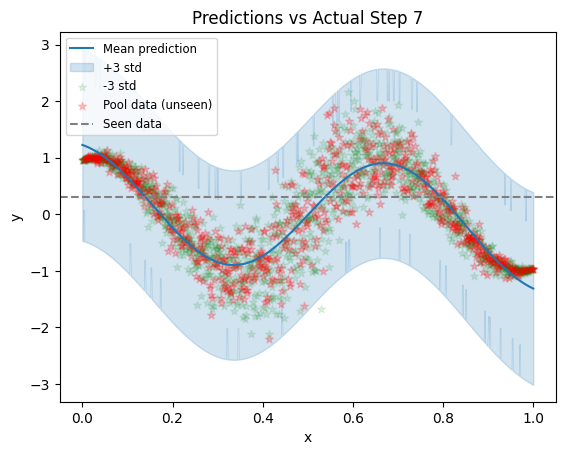

Step: 7 of 10, time-taken: 8.65 seconds
K_D, P_D (800, 2) (1200, 2)
Epoch 1/10 - Loss: 1.143   lengthscale: 0.693   noise: 0.693
Epoch 2/10 - Loss: 1.103   lengthscale: 0.644   noise: 0.644
Epoch 3/10 - Loss: 1.050   lengthscale: 0.598   noise: 0.598
Epoch 4/10 - Loss: 0.988   lengthscale: 0.555   noise: 0.554
Epoch 5/10 - Loss: 0.923   lengthscale: 0.514   noise: 0.513
Epoch 6/10 - Loss: 0.859   lengthscale: 0.474   noise: 0.474
Epoch 7/10 - Loss: 0.799   lengthscale: 0.438   noise: 0.437
Epoch 8/10 - Loss: 0.745   lengthscale: 0.403   noise: 0.402
Epoch 9/10 - Loss: 0.693   lengthscale: 0.372   noise: 0.369
Epoch 10/10 - Loss: 0.642   lengthscale: 0.343   noise: 0.338
Step: 8, Val-Loss: 0.1533


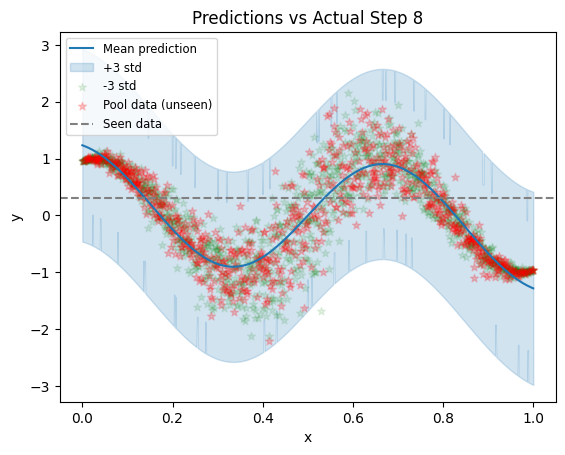

Step: 8 of 10, time-taken: 7.88 seconds
K_D, P_D (900, 2) (1100, 2)
Epoch 1/10 - Loss: 1.139   lengthscale: 0.693   noise: 0.693
Epoch 2/10 - Loss: 1.099   lengthscale: 0.644   noise: 0.644
Epoch 3/10 - Loss: 1.047   lengthscale: 0.598   noise: 0.598
Epoch 4/10 - Loss: 0.980   lengthscale: 0.555   noise: 0.554
Epoch 5/10 - Loss: 0.914   lengthscale: 0.513   noise: 0.513
Epoch 6/10 - Loss: 0.850   lengthscale: 0.474   noise: 0.474
Epoch 7/10 - Loss: 0.798   lengthscale: 0.437   noise: 0.437
Epoch 8/10 - Loss: 0.736   lengthscale: 0.403   noise: 0.402
Epoch 9/10 - Loss: 0.689   lengthscale: 0.372   noise: 0.369
Epoch 10/10 - Loss: 0.650   lengthscale: 0.343   noise: 0.339
Step: 9, Val-Loss: 0.1503


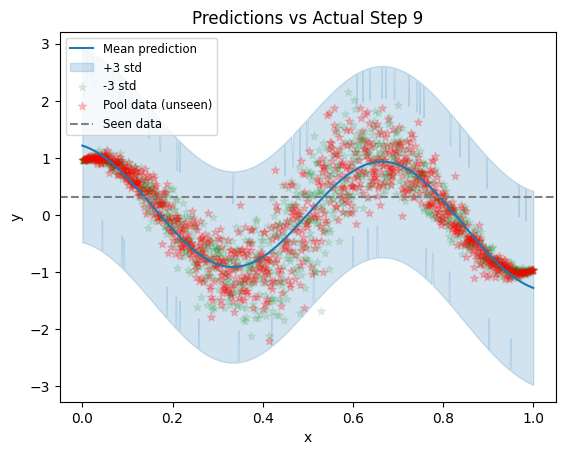

Step: 9 of 10, time-taken: 7.18 seconds
K_D, P_D (1000, 2) (1000, 2)
Epoch 1/10 - Loss: 1.141   lengthscale: 0.693   noise: 0.693
Epoch 2/10 - Loss: 1.096   lengthscale: 0.644   noise: 0.644
Epoch 3/10 - Loss: 1.037   lengthscale: 0.598   noise: 0.598
Epoch 4/10 - Loss: 0.974   lengthscale: 0.555   noise: 0.554
Epoch 5/10 - Loss: 0.911   lengthscale: 0.513   noise: 0.513
Epoch 6/10 - Loss: 0.852   lengthscale: 0.474   noise: 0.474
Epoch 7/10 - Loss: 0.799   lengthscale: 0.437   noise: 0.437
Epoch 8/10 - Loss: 0.741   lengthscale: 0.403   noise: 0.402
Epoch 9/10 - Loss: 0.701   lengthscale: 0.372   noise: 0.369
Epoch 10/10 - Loss: 0.646   lengthscale: 0.343   noise: 0.338
Step: 10, Val-Loss: 0.1522


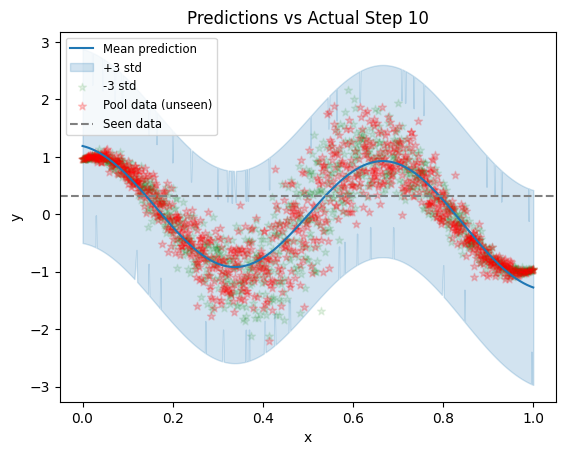

Step: 10 of 10, time-taken: 6.61 seconds


In [ ]:
# Train the model
for step in range(steps):
    start_step = time.time()
    preds = train_model(step) # Train the model
    print('Step: {} of {}, time-taken: {:.2f} seconds'.format(step+1, steps, time.time() - start_step))
    known_data, pool_data = acquisition_function(samples_per_step, pool_data, known_data) # Select the next samples from the pool

In [ ]:
preds

MultivariateNormal(loc: torch.Size([1000]))

In [ ]:
preds[0].mean.numpy()

array(-1.0002116, dtype=float32)

In [ ]:
len(preds.stddev)


1000

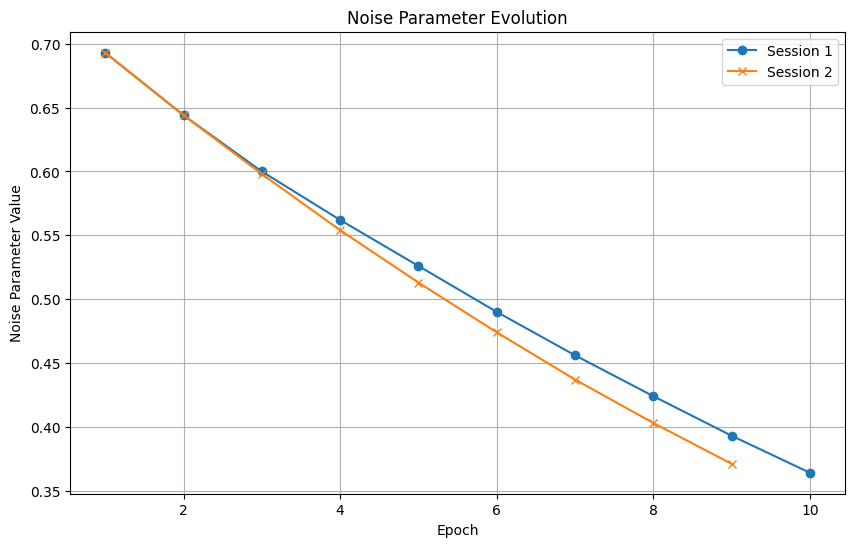

In [ ]:
import matplotlib.pyplot as plt

# Sample data: Noise parameter values over 10 epochs for two training sessions
noise_values_session1 = [0.693, 0.644, 0.600, 0.562, 0.526, 0.490, 0.456, 0.424, 0.393, 0.364]
noise_values_session2 = [0.693, 0.644, 0.598, 0.554, 0.513, 0.474, 0.437, 0.403, 0.371]

# Epoch numbers
epochs = list(range(1, len(noise_values_session1) + 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, noise_values_session1, label='Session 1', marker='o')
plt.plot(epochs[:len(noise_values_session2)], noise_values_session2, label='Session 2', marker='x')

# Adding some plot details
plt.title('Noise Parameter Evolution')
plt.xlabel('Epoch')
plt.ylabel('Noise Parameter Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
